## 1. Import Libraries and Datasets
## 2. Initial Hypotheses
## 3. Data Preprocessing
### 3A. Cleaning
- Handle any missing values or inconsistencies.
- Encode categorical variables (like surface, tourney_level, etc.).
- Create additional features if necessary (e.g., differences in rank between winner and loser, historical performance metrics, etc.).
### 3B.Feature Selection:
- Identify relevant features that might influence w_%1stWon and the match outcome.
### 3C. Model Training:
- Split the data into training and test sets.
- Train separate models for predicting w_%1stWon (a regression task) and the likelihood of winning the match (a classification task).
- Evaluate the models using appropriate metrics.
## 4. Final Thoughts

In [20]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
#Set Path
path = r'/Users/tristansavella/Desktop/Important Things/Data Analytics/CareerFoundry/Data Immersion/Achievement 6/Master Folder ATP/02 Data'

In [22]:
#Show all columns
pd.set_option('display.max_columns', None)

In [23]:
#Show all rows
pd.set_option('display.max_rows', None)

In [24]:
#Import df_matchstats
df_matchstats = pd.read_pickle(os.path.join(path, 'Prepared Data','df_matchstats.pkl'))

In [6]:
df_matchstats.head()

,tourney_id,Year,tourney_name,surface,tourney_level,winner_id,winner_ioc,winner_name,winner_age,winner_rank,winner_ht,loser_id,loser_ioc,loser_name,loser_rank,loser_ht,loser_age,best_of,round,minutes,w_#ServeGames,w_#aces,w_#dfs,w_#ServePoints,w_#1stServesIn,w_#2ndServePoints,w_%1stServesIn,w_#1stWon,w_%1stWon,w_#2ndWon,w_%2ndWon,w_bpSaved,w_#bpFaced,l_#ServeGames,l_#aces,l_#dfs,l_#ServePoints,l_#1stServesIn,l_#2ndServePoints,l_%1stServesIn,l_#1stWon,l_%1stWon,l_#2ndWon,l_%2ndWon,l_bpSaved,l_#bpFaced
119317,2000-301,2000,Auckland,Hard,A,103163,GER,Tommy Haas,21.7,11.0,188.0,101543,USA,Jeff Tarango,63.0,180.0,31.1,3,R32,108.0,17.0,18.0,4.0,96.0,49.0,47.0,51,39.0,79,28.0,59,3.0,5.0,17.0,7.0,8.0,106.0,55.0,51.0,51,39.0,70,29.0,56,4.0,7.0
119318,2000-301,2000,Auckland,Hard,A,102607,ESP,Juan Balcells,24.5,211.0,190.0,102644,ARG,Franco Squillari,49.0,183.0,24.3,3,R32,85.0,12.0,5.0,3.0,76.0,52.0,24.0,68,39.0,75,13.0,54,5.0,6.0,12.0,5.0,10.0,74.0,32.0,42.0,43,25.0,78,18.0,42,3.0,6.0
119319,2000-301,2000,Auckland,Hard,A,103252,ESP,Alberto Martin,21.3,48.0,175.0,102238,ESP,Alberto Berasategui,59.0,173.0,26.5,3,R32,56.0,8.0,0.0,0.0,55.0,35.0,20.0,63,25.0,71,12.0,60,1.0,1.0,8.0,0.0,6.0,56.0,33.0,23.0,58,20.0,60,7.0,30,7.0,11.0
119320,2000-301,2000,Auckland,Hard,A,103507,ESP,Juan Carlos Ferrero,19.9,45.0,183.0,103819,SUI,Roger Federer,61.0,185.0,18.4,3,R32,68.0,10.0,5.0,1.0,53.0,28.0,25.0,52,26.0,92,15.0,60,0.0,0.0,10.0,11.0,2.0,70.0,43.0,27.0,61,29.0,67,14.0,51,6.0,8.0
119321,2000-301,2000,Auckland,Hard,A,102103,USA,Michael Sell,27.3,167.0,180.0,102765,FRA,Nicolas Escude,34.0,185.0,23.7,3,R32,115.0,13.0,1.0,2.0,98.0,66.0,32.0,67,39.0,59,14.0,43,6.0,11.0,12.0,8.0,8.0,92.0,46.0,46.0,50,34.0,73,18.0,39,5.0,9.0


In [7]:
df_matchstats.shape

(62530, 46)

## 2. Initial Hypothesis

## 3. Linear Regression

In [8]:
# Select relevant features
features = df_matchstats[['w_%1stServesIn', 'w_%2ndWon', 'l_%1stServesIn', 'l_%1stWon', 'l_%2ndWon']]
target = df_matchstats['w_%1stWon']

In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

# Train the linear regression model

In [13]:
# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [14]:
# Make predictions and evaluate the model
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f'Linear Regression Model MSE: {mse}')
print(f'Linear Regression Model R^2: {r2}')

Linear Regression Model MSE: 63.31485739140991
Linear Regression Model R^2: 0.04850634129436604


In [16]:
# Get the coefficients of the linear regression model
coefficients = lin_reg.coef_
feature_names = features.columns

In [17]:
# Create a DataFrame for feature importance (coefficients)
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)
print(importance_df)

          Feature  Coefficient
3       l_%1stWon     0.117098
1       w_%2ndWon     0.073527
4       l_%2ndWon     0.047377
2  l_%1stServesIn     0.038940
0  w_%1stServesIn    -0.129790


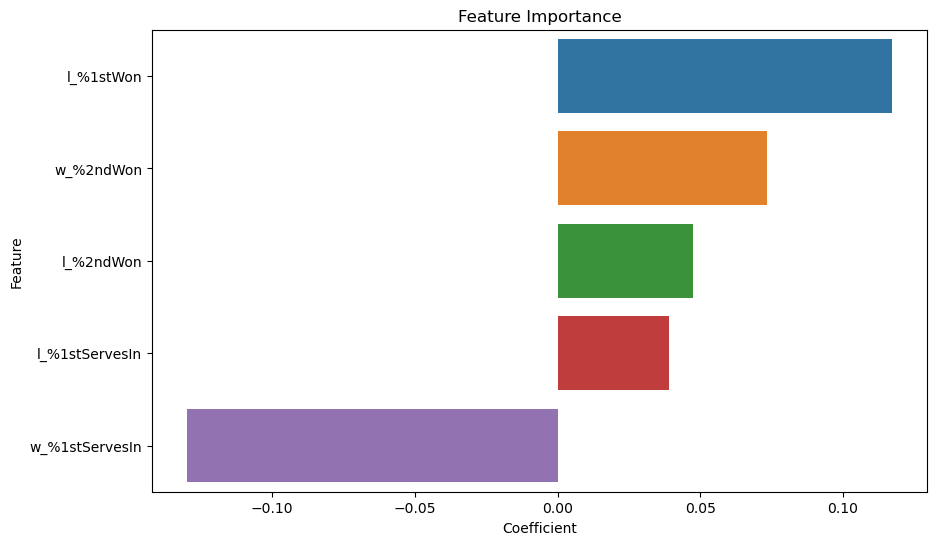

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

## Logistic Regression